In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import random
import numpy as np
import pylab
import quandl
# quandl.ApiConfig.api_key = "32peB6ExRM7Lihbpsdsd"
import seaborn as sns
sns.set()
%matplotlib inline
#textblob to apply sentiment analysis 
from textblob import TextBlob

In [2]:
#read the csv file containing tweets about 'Tesla'
parent_dir = '../using_twint/'
filename = 'tesla_tweets_3.csv'
tweets = pd.read_csv(parent_dir+ filename, low_memory=False)
tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,retweets_count,likes_count,location,hashtags,cashtags,link,retweet,quote_url,video,profile_image_url
0,682701956268343296,682701956268343296,1451603805000,2015-12-31,18:16:45,EDT,18131006,bgr,BGR.com,NaN,...,6,2,NaN,[],[],https://twitter.com/BGR/status/682701956268343296,NaN,NaN,0,https://pbs.twimg.com/profile_images/900756472...
1,682697919368196097,682697919368196097,1451602842000,2015-12-31,18:00:42,EDT,25053299,fortunemagazine,FORTUNE,NaN,...,15,21,NaN,[],[],https://twitter.com/FortuneMagazine/status/682...,NaN,NaN,0,https://pbs.twimg.com/profile_images/875382047...
2,682696607691755522,682696607691755522,1451602529000,2015-12-31,17:55:29,EDT,15342414,ricardoblanco,Mr. ¯\_(ツ)_/¯hite,NaN,...,0,0,NaN,[],[],https://twitter.com/RicardoBlanco/status/68269...,NaN,NaN,0,https://pbs.twimg.com/profile_images/113225875...
3,682695473803612160,682695053899345920,1451602259000,2015-12-31,17:50:59,EDT,15227849,semil,Semil,NaN,...,0,4,NaN,[],[],https://twitter.com/semil/status/6826954738036...,NaN,NaN,0,https://pbs.twimg.com/profile_images/997692272...
4,682688694910894080,682688694910894080,1451600643000,2015-12-31,17:24:03,EDT,38360819,alzeidenfeld,Al Smizzle,NaN,...,0,1,NaN,['#periscope'],[],https://twitter.com/AlZeidenfeld/status/682688...,NaN,NaN,0,https://pbs.twimg.com/profile_images/932784159...


In [3]:
tweets.tail()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,retweets_count,likes_count,location,hashtags,cashtags,link,retweet,quote_url,video,profile_image_url
45556,541551884193239040,541551884193239040,1417951005000,2014-12-07,06:16:45,EDT,2278321,hkanji,hussein kanji,NaN,...,0,3,NaN,[],[],https://twitter.com/hkanji/status/541551884193...,NaN,NaN,0,https://pbs.twimg.com/profile_images/29908212/...
45557,541536102566199300,541536102566199300,1417947242000,2014-12-07,05:14:02,EDT,1177420700,biaus,Business Insider AUS,NaN,...,1,0,NaN,[],[],https://twitter.com/BIAUS/status/5415361025661...,NaN,NaN,0,https://pbs.twimg.com/profile_images/895820368...
45558,541514657119612928,541514657119612928,1417942129000,2014-12-07,03:48:49,EDT,19722699,popsci,Popular Science,NaN,...,49,54,NaN,[],[],https://twitter.com/PopSci/status/541514657119...,NaN,NaN,0,https://pbs.twimg.com/profile_images/102908416...
45559,541498573532065793,541498573532065793,1417938295000,2014-12-07,02:44:55,EDT,31112537,sdmoores,Simon Moores,NaN,...,0,0,NaN,['#tesla'],[],https://twitter.com/sdmoores/status/5414985735...,NaN,NaN,0,https://pbs.twimg.com/profile_images/908657835...
45560,541468152454844416,541468152454844416,1417931042000,2014-12-07,00:44:02,EDT,1177420700,biaus,Business Insider AUS,NaN,...,0,0,NaN,[],[],https://twitter.com/BIAUS/status/5414681524548...,NaN,NaN,0,https://pbs.twimg.com/profile_images/895820368...


In [4]:
tweets.shape

(45561, 25)

In [5]:
#get a particular tweet text
some_tweet = tweets.iloc[random.randint(1, 100)]['tweet']
print(some_tweet)
#get the 'sentiment' of a particular tweet 
analysis = TextBlob(some_tweet)
print(analysis.sentiment)

Gareth Jones #OnSpeed  eps 267 & 268 The Cult of Tesla Pt1 & Pt2 now available  http://bit.ly/1Ct2sjx  #tesla  pic.twitter.com/uA40MxN7SC
Sentiment(polarity=0.4, subjectivity=0.4)


### Sentiment analysis with TextBlob

we may consider clean tweets before sentiment analysis

In [6]:
# tweets['polarity'] =  tweets['tweet'].apply( lambda x: TextBlob(x).polarity)
# tweets['subjectivity'] =  tweets['tweet'].apply( lambda x: TextBlob(x).subjectivity)

### Append extra features from 'date' for the ease of weekly aggregation

In [7]:
# #convert the 'date' column to datetime type
# tweets.date = pd.to_datetime(tweets.date)
# #append weekofyear, weekday(0=Mon,... 6=Sun), year based on date, 
# tweets['weekofyear'] = tweets['date'].dt.weekofyear
# tweets['weekday'] = tweets['date'].dt.weekday
# tweets['year'] = tweets['date'].dt.year

save the appended file

In [8]:
# tweets.to_csv(parent_dir + filename.strip('.csv') +'_appended.csv')

### laod the appended file

In [9]:

#specify dtype to avoid errors when reading from csv
dtype_spec = {'id':str, 'conversation_id': str, 'created_at': 'str', 'date': 'str', 'tweet':'str'}

tweets= pd.read_csv(parent_dir+filename.strip('.csv') +'_appended.csv', index_col = 0, dtype  = dtype_spec)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## daily aggregation of tweets

In [10]:
year = 2015
columns = ['polarity','subjectivity', 'date']
#average polarity and subjectivity
daily_tweets_sentiment_agg = tweets.loc[tweets['year'] == year, columns].groupby('date').mean()
#aggregate the daily tweets count
daily_tweets_sentiment_agg['tweets_count'] = tweets.loc[tweets['year'] == year,['date', 'polarity']].groupby('date').count()

In [11]:
print(daily_tweets_sentiment_agg.shape)
daily_tweets_sentiment_agg.head()

(365, 3)


,polarity,subjectivity,tweets_count
date,,,
2015-01-01,0.127195,0.279125,50
2015-01-02,0.085727,0.294966,63
2015-01-03,0.221293,0.384325,23
2015-01-04,0.083191,0.250531,28
2015-01-05,0.117798,0.222546,61


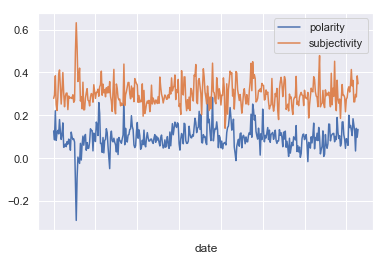

In [12]:
daily_tweets_sentiment_agg[['polarity','subjectivity']].plot()

Text(0, 0.5, 'counts')

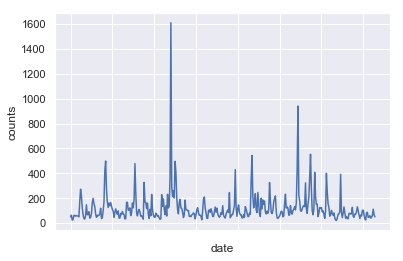

In [13]:
daily_tweets_sentiment_agg.tweets_count.plot()
plt.ylabel('counts')

Extract daily tweets number

## load stock price data

In [14]:
stock_data = pd.read_csv('../getStocks/TSLA.csv',index_col = 'Date', parse_dates = True)
stock_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-02,222.87,223.2500,213.2600,219.310,4764443.0,0.0,1.0,222.87,223.2500,213.2600,219.310,4764443.0
2015-01-05,214.55,216.5000,207.1626,210.090,5368477.0,0.0,1.0,214.55,216.5000,207.1626,210.090,5368477.0
2015-01-06,210.06,214.2000,204.2100,211.280,6261936.0,0.0,1.0,210.06,214.2000,204.2100,211.280,6261936.0
2015-01-07,213.35,214.7800,209.7800,210.950,2968390.0,0.0,1.0,213.35,214.7800,209.7800,210.950,2968390.0
2015-01-08,212.81,213.7999,210.0100,210.615,3442509.0,0.0,1.0,212.81,213.7999,210.0100,210.615,3442509.0


### specialize to year == 2015

Note that due to weekends and holidays we have less stock price data

In [15]:
year = 2015
columns = ['Close']
stock_daily_close = stock_data.loc[stock_data.index.year == year, columns]
stock_daily_close.shape


(252, 1)

In [16]:
stock_daily_close.head()

,Close
Date,
2015-01-02,219.310
2015-01-05,210.090
2015-01-06,211.280
2015-01-07,210.950
2015-01-08,210.615


Join stock close, tweets polarity and tweets number into one single dataframe

In [17]:
ts_df = daily_tweets_sentiment_agg.join(stock_daily_close)
ts_df.head()

,polarity,subjectivity,tweets_count,Close
date,,,,
2015-01-01,0.127195,0.279125,50,NaN
2015-01-02,0.085727,0.294966,63,219.31
2015-01-03,0.221293,0.384325,23,NaN
2015-01-04,0.083191,0.250531,28,NaN
2015-01-05,0.117798,0.222546,61,210.09


In [18]:
ts_df.index[:3]

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03'], dtype='datetime64[ns]', name='date', freq=None)

In [19]:
daily_tweets_sentiment_agg.head(3)

,polarity,subjectivity,tweets_count
date,,,
2015-01-01,0.127195,0.279125,50
2015-01-02,0.085727,0.294966,63
2015-01-03,0.221293,0.384325,23


In [20]:
#create 'psuedo_date' to aggregate the tweets statistics for stock close dates
#every pseudo_date is one of the stock_open date except for the first row

# del temp_tweets
temp_tweets = daily_tweets_sentiment_agg 
temp_tweets['pseudo_date'] = 0 #declare a column

#assign pseudo date
pseudo_date = (stock_daily_close.index.min()-datetime.timedelta(days=1)).date()
for date in temp_tweets.index:
    if date in stock_daily_close.index:
        pseudo_date = date 
    temp_tweets.loc[date,'pseudo_date'] = pseudo_date

    
print('There are {} differnt pseudo_date '.format(temp_tweets['pseudo_date'].unique().shape[0]))
print('pseudo_date has min = {}, max = {}'.format(
    temp_tweets['pseudo_date'].unique()[0],temp_tweets['pseudo_date'].unique()[-1]))

print('There are {} differnt open stock dates '.format(stock_daily_close.shape[0]))
print('open stock dates has min = {}, max = {}'.format(stock_daily_close.index[0],stock_daily_close.index[-1]))


temp_tweets.head(5)

# print(stock_daily_close.index[:5])

# temp_tweets['pseudo_date'] = 

There are 253 differnt pseudo_date 
pseudo_date has min = 2015-01-01, max = 2015-12-31
There are 252 differnt open stock dates 
open stock dates has min = 2015-01-02 00:00:00, max = 2015-12-31 00:00:00


,polarity,subjectivity,tweets_count,pseudo_date
date,,,,
2015-01-01,0.127195,0.279125,50,2015-01-01
2015-01-02,0.085727,0.294966,63,2015-01-02
2015-01-03,0.221293,0.384325,23,2015-01-02
2015-01-04,0.083191,0.250531,28,2015-01-02
2015-01-05,0.117798,0.222546,61,2015-01-05


### tweets+stocks on only stock open days where tweets are aggregated

In [21]:
ts = pd.DataFrame(index = pd.to_datetime(temp_tweets.pseudo_date.unique()) )#important to have the index as pd.datetime


#append pseudo_date sentiments
tweets_sentiment_columns = ['polarity', 'subjectivity']
for col  in tweets_sentiment_columns:
    ts[col] = temp_tweets.groupby('pseudo_date').apply(lambda x: np.average(x[col], weights=x['tweets_count']))

#append pseudo_date tweets counts
ts['pseudo_tweets_count'] = temp_tweets.groupby('pseudo_date').apply(lambda x: sum( x['tweets_count']))

# stock_daily_close.index =stock_daily_close.index.date

#append psudo_date stock prices
ts = pd.concat([ts,stock_daily_close], axis =1,  join = 'outer' )
ts.head()

,polarity,subjectivity,pseudo_tweets_count,Close
2015-01-01,0.127195,0.279125,50,NaN
2015-01-02,0.112455,0.302081,114,219.31
2015-01-05,0.117798,0.222546,61,210.09
2015-01-06,0.129907,0.284972,61,211.28
2015-01-07,0.113622,0.389819,56,210.95


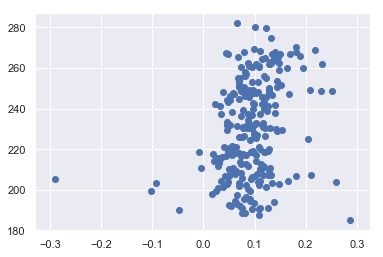

In [22]:
plt.scatter(ts['polarity'].values[:-1], ts['Close'].values[1:])

In [23]:
ts.to_csv('tweets_and_stock_on_stockOpenDays.csv')

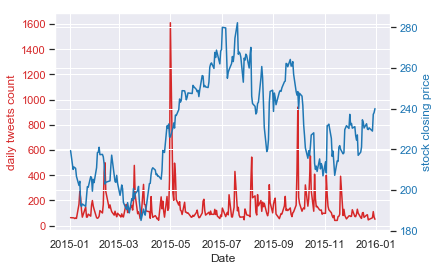

In [24]:
temp = stock_daily_close.join(daily_tweets_sentiment_agg, how = 'left')
temp.head()
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('daily tweets count', color=color)
ax1.plot(temp['tweets_count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('stock closing price', color=color)  # we already handled the x-label with ax1
ax2.plot(temp.Close,label="Daily closing price", color=color)
ax2.tick_params(axis='y', labelcolor=color)


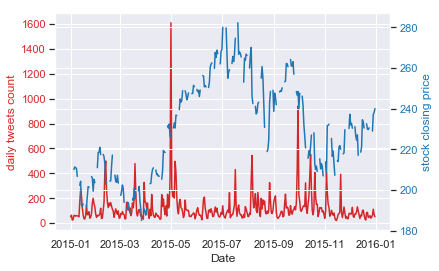

In [25]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('daily tweets count', color=color)
ax1.plot(ts_df['tweets_count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('stock closing price', color=color)  # we already handled the x-label with ax1
ax2.plot(ts_df.Close,label="Daily closing price", color=color)
ax2.tick_params(axis='y', labelcolor=color)


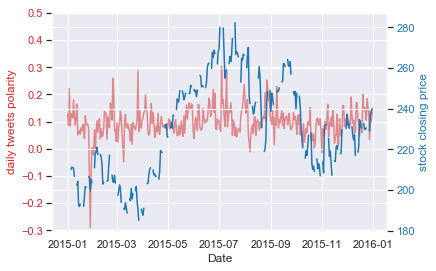

In [26]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('daily tweets polarity', color=color)

ax1.plot(ts_df['polarity'], color=color, alpha = .5 )
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim((-0.3,.5))


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('stock closing price', color=color)  # we already handled the x-label with ax1
ax2.plot(ts_df.Close,label="Daily closing price", color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [27]:
columns = ['polarity', 'weekofyear']
weekly_pol = tweets.loc[tweets['year'] == 2015, columns].groupby('weekofyear').mean()
weekly_pol = weekly_pol[:-1]

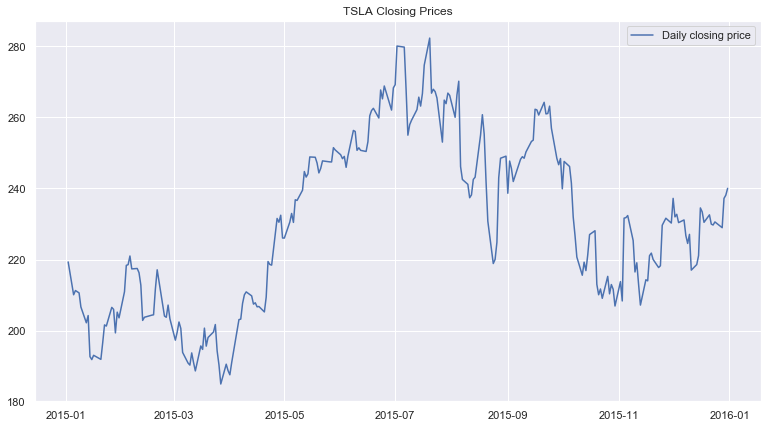

In [28]:
#get the weekly percent difference in the stock prices 
start = datetime.datetime(2015,1,1) # Beginning of period 
end = datetime.datetime(2016,1,1) # End of period 
stock = "TSLA" # some stock label we are interested in
data = quandl.get("WIKI/" + stock, start_date=start, end_date=end)
pylab.rcParams['figure.figsize'] = (13, 7)
plt.title(stock + " Closing Prices")
plt.plot(data["Close"],label="Daily closing price") # plot daily closing prices 
plt.legend()
plt.show()

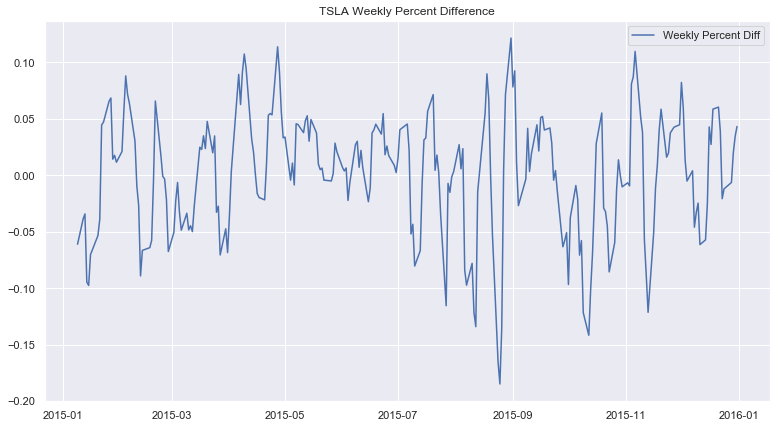

In [29]:
#get the weekly percent difference in the stock price
data["WeekPercDiff"] = data["Close"].diff(periods=5) / data["Close"]
plt.title(stock + " Weekly Percent Difference")
plt.plot(data["WeekPercDiff"],label="Weekly Percent Diff") # plot daily closing prices 
plt.legend()
plt.show()

In [30]:
data['weekofyear'] = data.index.weekofyear
data['weekday'] = data.index.weekday
data['year'] = data.index.year

In [31]:
#get price percent differences on fridays (weekday == 4)
wed_stocks = data.loc[data['weekday'] == 2]
wed_stocks.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,WeekPercDiff,weekofyear,weekday,year
Date,,,,,,,,,,,,,,,,
2015-01-07,213.35,214.780,209.78,210.95,2968390.0,0.0,1.0,213.35,214.780,209.78,210.95,2968390.0,NaN,2,2,2015
2015-01-14,185.83,195.200,185.00,192.69,11551855.0,0.0,1.0,185.83,195.200,185.00,192.69,11551855.0,-0.094764,3,2,2015
2015-01-21,189.55,198.680,189.51,196.57,4153043.0,0.0,1.0,189.55,198.680,189.51,196.57,4153043.0,-0.039070,4,2,2015
2015-01-28,206.11,206.368,198.42,199.37,3149606.0,0.0,1.0,206.11,206.368,198.42,199.37,3149606.0,0.014044,5,2,2015
2015-02-04,218.29,221.479,216.80,218.55,3305377.0,0.0,1.0,218.29,221.479,216.80,218.55,3305377.0,0.087760,6,2,2015


/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


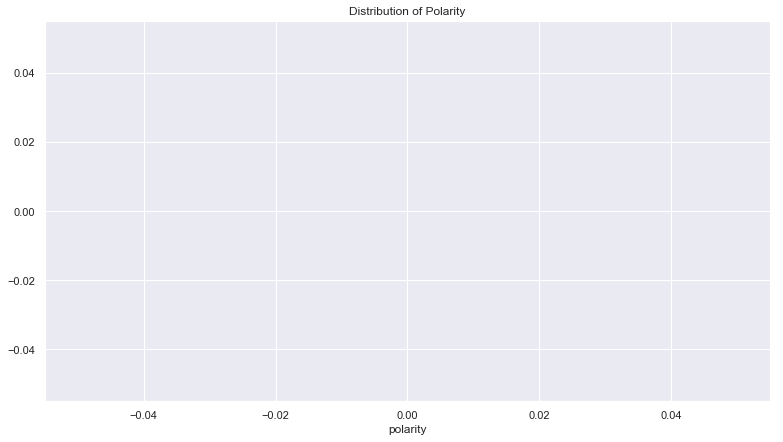

In [32]:
plt.title("Distribution of Polarity")
plt.xlabel("Polarity")
#plt.hist(weekly_pol['polarity'])
sns.distplot(weekly_pol['polarity'])
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 2.,  1.,  2.,  5.,  6.,  8., 10.,  7.,  6.,  4.]),
 array([-0.13525173, -0.11250132, -0.08975091, -0.06700049, -0.04425008,
        -0.02149966,  0.00125075,  0.02400117,  0.04675158,  0.069502  ,
         0.09225241]),
 <a list of 10 Patch objects>)

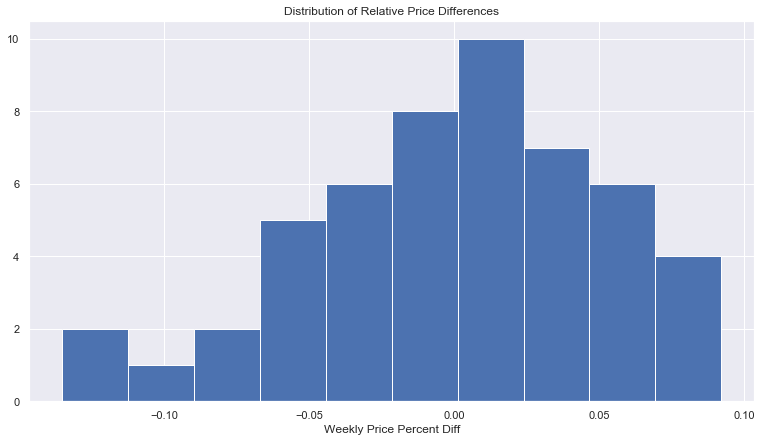

In [33]:
plt.title("Distribution of Relative Price Differences")
plt.xlabel("Weekly Price Percent Diff")
#sns.distplot(wed_stocks["WeekPercDiff"])
plt.hist(wed_stocks["WeekPercDiff"])